# Tutorial for Mesoscale Two-Photon Calcium Imaging of Population Level Odor Responses from the Mouse Olfactory Bulb. 

This tutorial shows how to access the data related to [DANDI:001170](https://dandiarchive.org/dandiset/001170/draft) using `pynwb`. 

This dataset contains the 2-photon calcium imaging, treadmill position and velocity traces and odor stimulus events, along with subject and session metadata.

Contents:

- [Streaming an NWB file](#stream-nwb)
- [Reading an NWB file](#read-nwb)
- [Access Subject and Session metadata](#access-subject)
- [Access Raw Imaging](#access-raw-imaging)
- [Access Processed Imaging](#access-raw-imaging)
- [Access Odor Stimuli](#access-odor)
- [Access Treadmill traces](#access-treadmill)

# Select the subject and session you want to load

In [1]:
subject_id = 134
session_id = 22
nwbfile_path = f"sub-{subject_id}/sub-{subject_id}_ses-{session_id}_behavior+ophys.nwb"

# Streaming an NWB file <a id="stream-nwb"></a>

This section demonstrates how to access the files on the [DANDI Archive](https://dandiarchive.org) without downloading them. Based on the [Streaming NWB files](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

The `dandi.dandiapi.DandiAPIClient` can be used to get the S3 URL of the NWB file stored in the DANDI Archive.

In [2]:
from dandi.dandiapi import DandiAPIClient

dandiset_id = "001170"

with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(nwbfile_path)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=False)


We will use `remfile` for streaming the file. You can read more about `remfile` at [this tutorial section](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html#method-3-remfile).

In [3]:
import h5py
import remfile

file = remfile.File(s3_url)
h5_file = h5py.File(file, "r")

# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.


In [4]:
from pynwb import NWBHDF5IO
io = NWBHDF5IO(file=h5_file, load_namespaces=True)
nwbfile = io.read()
nwbfile

root pynwb.file.NWBFile at 0x2094980749840
Fields:
  acquisition: {
    treadmill_position <class 'pynwb.behavior.SpatialSeries'>,
    two_photon_series_FOV1_channel1 <class 'pynwb.ophys.TwoPhotonSeries'>,
    two_photon_series_FOV2_channel1 <class 'pynwb.ophys.TwoPhotonSeries'>,
    two_photon_series_FOV3_channel1 <class 'pynwb.ophys.TwoPhotonSeries'>
  }
  devices: {
    two_photon_microscope <class 'pynwb.device.Device'>
  }
  experiment_description: Awake mice were head fixed on a running wheel and presented with odors. A meso-scale two-photon microscope was used to image glomerular activity in the olfactory bulb.
  experimenter: ['Pirhayatifard, Delaram' 'Hanson, Elizabeth' 'Pfaffinger, Paul'
 'Arenkiel, Benjamin' 'Reimer, Jacob']
  file_create_date: [datetime.datetime(2024, 8, 7, 0, 21, 45, 469158, tzinfo=tzoffset(None, 7200))]
  identifier: ed03639d-3530-41f0-ab25-a0c31631a85a
  imaging_planes: {
    imaging_plane_channel1 <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: Baylor College of Medicine
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (3,), type "|O">
  lab: Reimer-Arenkiel
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['https://doi.org/10.1101/2023.04.24.538157'
 'https://icml-compbio.github.io/2023/papers/WCBICML2023_paper122.pdf']
  session_description: In this study, we explore odor-evoked activity representation in the olfactory bulb (OB) and how odor responses enable odor discrimination. Contrary to some previously cited theories that suggest a sparse representation, we hypothesize a more dense representation during odor presentation. A key question is how odors are reliably encoded in OB activity patterns, and how these patterns contribute to early odor processing. To address this problem, we recorded population level odor responses from the mouse OB with mesoscale two photon calcium imaging and applied machine learning techniques to suggest a model in which sparse coding is largely sufficient for olfaction, but redundant information may make odor coding more robust across different variables.
  session_id: 22
  session_start_time: 2022-07-21 00:00:00-05:00
  subject: subject pynwb.file.Subject at 0x2094980756240
Fields:
  age__reference: birth
  date_of_birth: 2021-07-15 00:00:00+02:00
  description: ArenkielMouse
  sex: M
  species: Mus musculus
  subject_id: 134

  timestamps_reference_time: 2022-07-21 00:00:00-05:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>

Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from all_sessions.Session datajoint table.

In [5]:
nwbfile.session_start_time

datetime.datetime(2022, 7, 21, 0, 0, tzinfo=tzoffset(None, -18000))

The experiment description or the session description can be easily accessed with `nwbfile.experiment_description` and `nwbfile.session_description` 

In [6]:
nwbfile.experiment_description

'Awake mice were head fixed on a running wheel and presented with odors. A meso-scale two-photon microscope was used to image glomerular activity in the olfactory bulb.'

In [7]:
nwbfile.session_description

'In this study, we explore odor-evoked activity representation in the olfactory bulb (OB) and how odor responses enable odor discrimination. Contrary to some previously cited theories that suggest a sparse representation, we hypothesize a more dense representation during odor presentation. A key question is how odors are reliably encoded in OB activity patterns, and how these patterns contribute to early odor processing. To address this problem, we recorded population level odor responses from the mouse OB with mesoscale two photon calcium imaging and applied machine learning techniques to suggest a model in which sparse coding is largely sufficient for olfaction, but redundant information may make odor coding more robust across different variables.'

# Access subject <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [8]:
nwbfile.subject

subject pynwb.file.Subject at 0x2094980756240
Fields:
  age__reference: birth
  date_of_birth: 2021-07-15 00:00:00+02:00
  description: ArenkielMouse
  sex: M
  species: Mus musculus
  subject_id: 134

# Access TwoPhoton Imaging

This section demonstraces how to access the raw Two Photon imaging data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw TwoPhoton Imaging <a name="access-imaging"></a>

The raw TwoPhoton imaging data is stored in `pynwb.ophys.TwoPhotonSeries` objects (for each channel and plane separately) which is added to `nwbfile.acquisition`.

The data in [TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

In [9]:
photon_series_names = [photon_series_name for photon_series_name in nwbfile.acquisition.keys() if "two_photon_series" in photon_series_name]
print(photon_series_names)

['two_photon_series_FOV1_channel1', 'two_photon_series_FOV2_channel1', 'two_photon_series_FOV3_channel1']


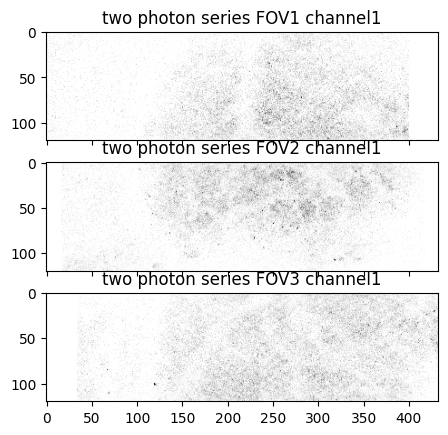

In [10]:
# Visualize the imaging data.
from matplotlib import pyplot as plt
fig, axs = plt.subplots(nrows=len(photon_series_names), ncols=1, sharex=True, sharey=True)
for ps_index,ps_name in enumerate(photon_series_names):    
    photon_series = nwbfile.acquisition[ps_name]
    axs[ps_index].imshow(photon_series.data[70], cmap="binary")
    axs[ps_index].set_title(ps_name.replace("_"," "))
plt.show()


Imaging metadata include information on the **device** used to acquire the image and the **optical channel** specs contained in the imaging plane object

In [11]:
nwbfile.devices["two_photon_microscope"]

two_photon_microscope pynwb.device.Device at 0x2094980783824
Fields:
  description: Janelia 2P-RAM mesoscope.
  manufacturer: ThorLabs

In [12]:
nwbfile.imaging_planes["imaging_plane_channel1"]

imaging_plane_channel1 pynwb.ophys.ImagingPlane at 0x2094980682512
Fields:
  conversion: 1.0
  description: Imaging plane for the Green channel recorded with 2p microscope.
  device: two_photon_microscope pynwb.device.Device at 0x2094980783824
Fields:
  description: Janelia 2P-RAM mesoscope.
  manufacturer: ThorLabs

  excitation_lambda: 920.0
  grid_spacing_unit: meters
  indicator: GCaMP6f
  location: OB
  optical_channel: (
    channel_1 <class 'pynwb.ophys.OpticalChannel'>
  )
  origin_coords_unit: meters
  unit: meters

## Accessing the segmentation data

The segmentation output for the Two Photon Imaging data is stored in `nwbfile.processing["ophys"]`. 

In NWB, the [PlaneSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.PlaneSegmentation) class stores the detected regions of interest in the [TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) data. The [ImageSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.ImageSegmentation) can contain multiple `PlaneSegmentation` tables, so that we can store results of different segmentation algorithms or different segmentation classes.

We can access the plane segmentation for the [TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) data as 
`nwbfile.processing["ophys"]["ImageSegmentation"]["PlaneSegmentationChannel_number_Plane_number_"]`.


In [13]:
nwbfile.processing["ophys"]

ophys pynwb.base.ProcessingModule at 0x2094979301712
Fields:
  data_interfaces: {
    average_images <class 'pynwb.base.Images'>,
    correlation_images <class 'pynwb.base.Images'>,
    fluorescence <class 'pynwb.ophys.Fluorescence'>,
    image_segmentation <class 'pynwb.ophys.ImageSegmentation'>
  }
  description: ophys data processing

#### Plot Correlation Images

In [14]:
correlation_images_names = list(nwbfile.processing["ophys"]["correlation_images"].images.keys())
_ = [print(name) for name in correlation_images_names]

correlation_image_FOV1_channel1
correlation_image_FOV2_channel1
correlation_image_FOV3_channel1


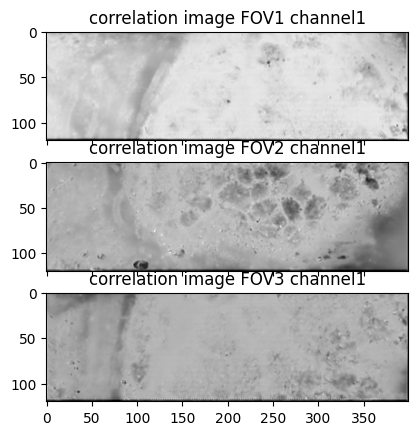

In [15]:
fig, axs = plt.subplots(nrows=len(correlation_images_names), ncols=1, sharex=True, sharey=True)
for ci_index,ci_name in enumerate(correlation_images_names):    
    correlation_image = nwbfile.processing["ophys"]["correlation_images"].images[ci_name]
    axs[ci_index].imshow(correlation_image.data[:].T, cmap="binary")
    axs[ci_index].set_title(ci_name.replace("_"," "))
plt.show()

#### Plot Average Images

In [16]:
average_images_names = list(nwbfile.processing["ophys"]["average_images"].images.keys())
_ = [print(name) for name in average_images_names]

average_image_FOV1_channel1
average_image_FOV2_channel1
average_image_FOV3_channel1


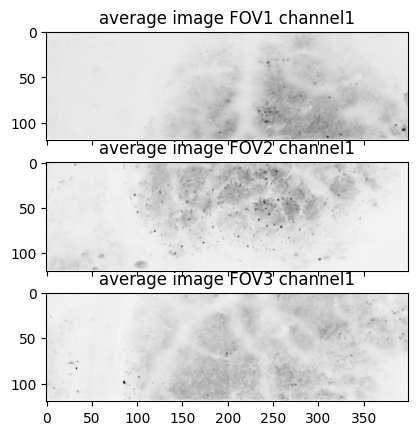

In [17]:
fig, axs = plt.subplots(nrows=len(average_images_names), ncols=1, sharex=True, sharey=True)
for ai_index,ai_name in enumerate(average_images_names):    
    average_image = nwbfile.processing["ophys"]["average_images"].images[ai_name]
    axs[ai_index].imshow(average_image.data[:].T, cmap="binary")
    axs[ai_index].set_title(ai_name.replace("_"," "))
plt.show()

#### Plot Image Segmentation

In [18]:
plane_segmentation_names = list(nwbfile.processing["ophys"]["image_segmentation"].plane_segmentations.keys())
_ = [print(name) for name in nwbfile.processing["ophys"]["image_segmentation"].plane_segmentations.keys()]

plane_segmentation_FOV1_channel1
plane_segmentation_FOV2_channel1
plane_segmentation_FOV3_channel1


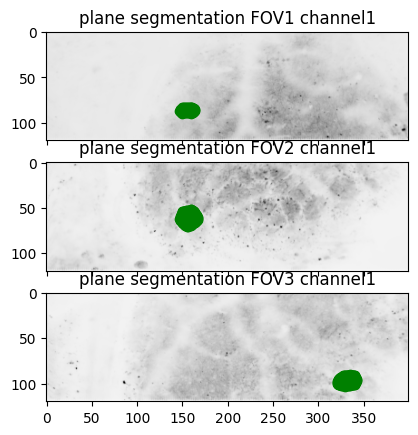

In [19]:
ROI_index = 0

fig, axs = plt.subplots(nrows=len(plane_segmentation_names), ncols=1, sharex=True, sharey=True)
for ps_index,ps_name in enumerate(plane_segmentation_names):    
    average_image = nwbfile.processing["ophys"]["average_images"].images[average_images_names[ps_index]]
    axs[ps_index].imshow(average_image.data[:].T, cmap="binary")
    plane_segmentation = nwbfile.processing["ophys"]["image_segmentation"].plane_segmentations[ps_name]
    x_coordinates = [pix[0] for pix in plane_segmentation[ROI_index].pixel_mask[0]]
    y_coordinates = [pix[1] for pix in plane_segmentation[ROI_index].pixel_mask[0]]
    axs[ps_index].scatter(x_coordinates, y_coordinates, color="green")
    axs[ps_index].set_title(ps_name.replace("_"," "))
plt.show()

## Visualize fluorescence traces
The fluroscence traces are stored in a [Fluorescence](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.Fluorescence) container, the raw traces can be accessed as `nwbfile.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]`.

In [20]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

fluorescence_traces_names = [name for name in nwbfile.processing["ophys"]["fluorescence"].roi_response_series.keys()]

fluorescence_traces_name = fluorescence_traces_names[0]
fluorescence_traces = nwbfile.processing["ophys"]["fluorescence"][fluorescence_traces_name].data[:1000, :10]
df = pd.DataFrame(fluorescence_traces)
df["time"] = nwbfile.processing["ophys"]["fluorescence"][fluorescence_traces_name].timestamps[:1000]
df.set_index("time", inplace=True)
df.columns.name = 'ROIs'

import plotly.express as px

fig = px.line(df, facet_row="ROIs", facet_row_spacing=0.01)

# hide and lock down axes
fig.update_xaxes(visible=True, fixedrange=False)
fig.update_yaxes(visible=False, fixedrange=False)

# remove facet/subplot labels
fig.update_layout(annotations=[], overwrite=True)

# strip down the rest of the plot
fig.update_layout(
    showlegend=True,
    plot_bgcolor="white",
    margin=dict(t=10, l=10, b=10, r=10)
)

fig.show(config=dict(displayModeBar=True))

# Access Odor stimuli <a name="access-odor"></a>

This section demonstrates how to access the odor stimulation data and metadata.


In [21]:
nwbfile.trials.to_dataframe()

start_time  stop_time            odorant  concentration solution_date
id                                                                        
0       59.2888    60.2928  Methyl Salicylate            0.1    2022-05-17
1       60.2966    61.2995  Methyl Salicylate            0.1    2022-05-17
2       61.3034    62.3067  Methyl Salicylate            0.1    2022-05-17
3       62.3106    63.3130  Methyl Salicylate            0.1    2022-05-17
4       63.3170    64.3213  Methyl Salicylate            0.1    2022-05-17
..          ...        ...                ...            ...           ...
495   9675.0000  9676.0000  Methyl Salicylate            0.1    2022-05-17
496   9676.0000  9677.0100  Methyl Salicylate            0.1    2022-05-17
497   9677.0100  9678.0100  Methyl Salicylate            0.1    2022-05-17
498   9678.0200  9679.0200  Methyl Salicylate            0.1    2022-05-17
499   9679.0200  9680.0300  Methyl Salicylate            0.1    2022-05-17

[500 rows x 5 columns]

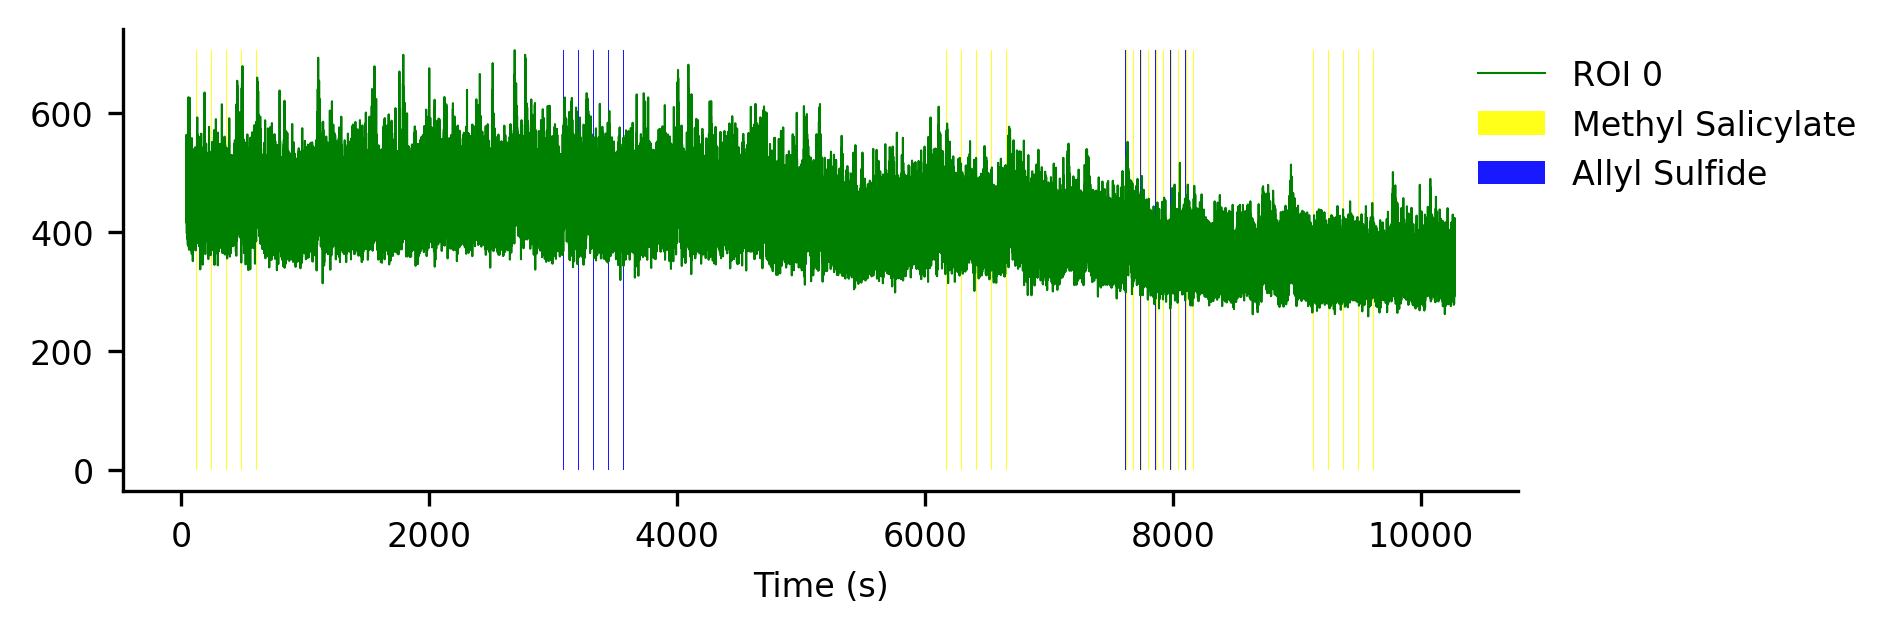

In [22]:
# Prepare data for plotting
import numpy as np
ROI_index=0
start=0
stop=-1
fluorescence_data = nwbfile.processing["ophys"]["fluorescence"][fluorescence_traces_name].data[start:stop, ROI_index]
fluorescence_timestamps = nwbfile.processing["ophys"]["fluorescence"][fluorescence_traces_name].timestamps[start:stop]

fig, ax = plt.subplots(figsize=(6, 2), dpi=300)
line_handle, = ax.plot(fluorescence_timestamps, fluorescence_data, color="green", linewidth=0.5, label="ROI {ROI_index}".format(ROI_index=ROI_index))

stimulus_table = nwbfile.trials.to_dataframe()
methyl_salicylate_stim = "Methyl Salicylate"
methyl_salicylate_stim_table = stimulus_table[stimulus_table["odorant"]==methyl_salicylate_stim]
methyl_salicylate_stim_handles = []
for (stimulus_start, stimulus_stop) in zip(methyl_salicylate_stim_table["start_time"], methyl_salicylate_stim_table["stop_time"]):
    methyl_salicylate_stim_handle = ax.fill_between(fluorescence_timestamps, np.nanmax(fluorescence_data), where=(fluorescence_timestamps >= stimulus_start) & (fluorescence_timestamps <= stimulus_stop),
                                    color='yellow', edgecolor='none', alpha=0.9, label=methyl_salicylate_stim)
    methyl_salicylate_stim_handles.append(methyl_salicylate_stim_handle)

allyl_sulfide_stim = "Allyl Sulfide"
allyl_sulfide_stim_table = stimulus_table[stimulus_table["odorant"]==allyl_sulfide_stim]
allyl_sulfide_stim_handles = []
for (stimulus_start, stimulus_stop) in zip(allyl_sulfide_stim_table["start_time"], allyl_sulfide_stim_table["stop_time"]):
    allyl_sulfide_stim_handle = ax.fill_between(fluorescence_timestamps, np.nanmax(fluorescence_data), where=(fluorescence_timestamps >= stimulus_start) & (fluorescence_timestamps <= stimulus_stop),
                                    color='blue', edgecolor='none', alpha=0.9, label=allyl_sulfide_stim)
    allyl_sulfide_stim_handles.append(allyl_sulfide_stim_handle)

# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create the legend with the appropriate handles
handles = [line_handle, methyl_salicylate_stim_handles[0], allyl_sulfide_stim_handles[0]]
labels = ["ROI {ROI_index}".format(ROI_index=ROI_index), methyl_salicylate_stim, allyl_sulfide_stim]
ax.legend(handles, labels, frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})

ax.tick_params(axis='y', labelsize=8)
plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()

# Access Treadmill Traces <a name="access-treadmill"></a>

This section demonstrates how to access the treadmill data.

In [23]:
nwbfile.acquisition["treadmill_position"]

treadmill_position pynwb.behavior.SpatialSeries at 0x2094978773008
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1044900,), type "<f8">
  description: treadmill position from Treadmill table
  interval: 1
  offset: 0.0
  reference_frame: unknown
  resolution: -1.0
  timestamp_link: (
    treadmill_velocity <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (1044900,), type "<f8">
  timestamps_unit: seconds
  unit: meters

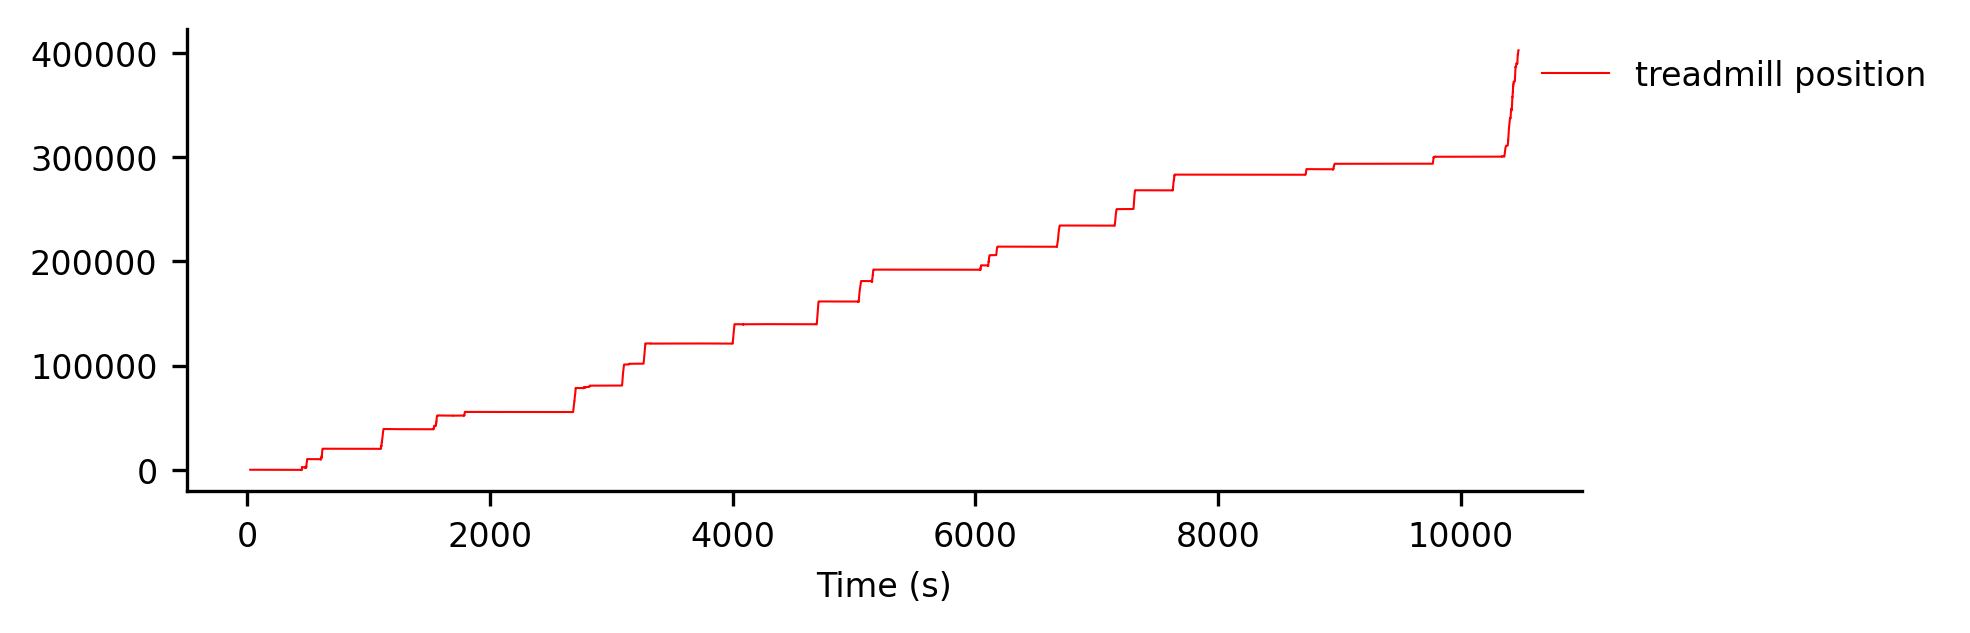

In [24]:
start=0
stop=-1
treadmill_data = nwbfile.acquisition["treadmill_position"].data[start:stop]
treadmill_timestamps = nwbfile.acquisition["treadmill_position"].timestamps[start:stop]

fig, ax = plt.subplots(figsize=(6, 2), dpi=300)
ax.plot(treadmill_timestamps, treadmill_data, color="red", linewidth=0.5, label="treadmill position")

# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create the 
ax.legend(frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})

ax.tick_params(axis='y', labelsize=8)
plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()

In [25]:
nwbfile.processing["behavior"]["treadmill_velocity"]

treadmill_velocity pynwb.base.TimeSeries at 0x2094980788432
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1044900,), type "<f8">
  description: treadmill velocity from Treadmill table
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: treadmill_position pynwb.behavior.SpatialSeries at 0x2094978773008
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1044900,), type "<f8">
  description: treadmill position from Treadmill table
  interval: 1
  offset: 0.0
  reference_frame: unknown
  resolution: -1.0
  timestamp_link: (
    treadmill_velocity <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (1044900,), type "<f8">
  timestamps_unit: seconds
  unit: meters

  timestamps_unit: seconds
  unit: unknown

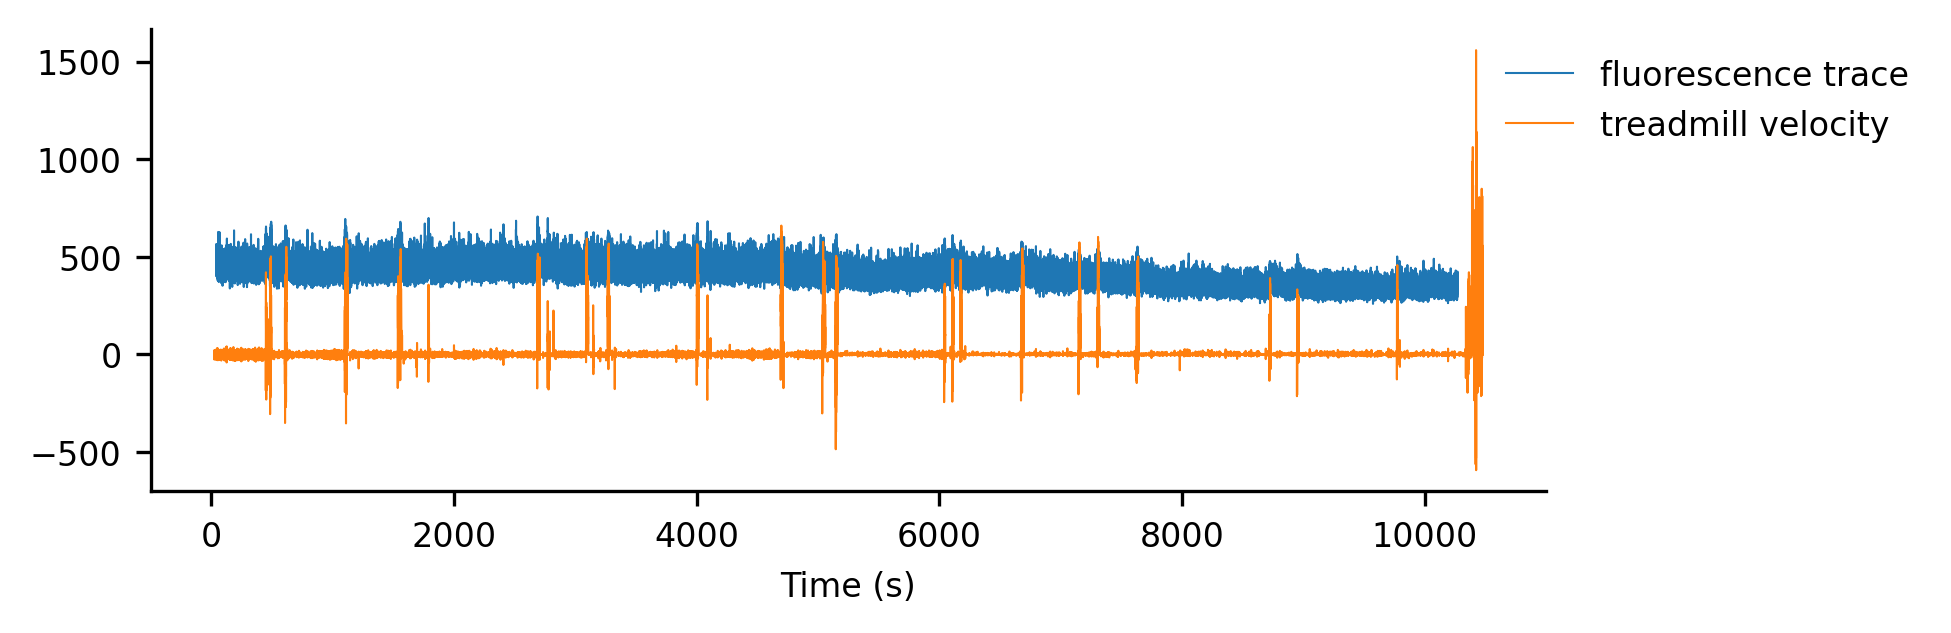

In [26]:
data = nwbfile.processing["behavior"]["treadmill_velocity"].data[start:stop]
treadmill_timestamps = nwbfile.acquisition["treadmill_position"].timestamps[start:stop]

fig, ax = plt.subplots(figsize=(6, 2), dpi=300)
ax.plot(fluorescence_timestamps, fluorescence_data, linewidth=0.5, label="fluorescence trace")
ax.plot(treadmill_timestamps, data*25, linewidth=0.5, label="treadmill velocity")

# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create the 
ax.legend(frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})

ax.tick_params(axis='y', labelsize=8)
plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()